In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10, 5)
sns.set_style('darkgrid')

# Decision Tree Classifier

In [2]:
iris = load_iris()

# Petal Length and Petal Width
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## Visualize a Tree

In [4]:
from sklearn.tree import export_graphviz

In [7]:
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [12]:
 tree_clf.predict([[5.0, 1.5]])

array([1])

In [13]:
tree_clf.predict_proba([[5.0, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
ar = tree_clf.predict_proba([[5.0, 1.5]])

In [21]:
np.round(1 - np.sum(ar ** 2),3)

0.168

In [29]:
ar2 = ar[0][1:]

In [31]:
-np.sum(ar2 * np.log2(ar2))

0.44506485705083865

# Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

In [40]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(" {n}: {s}".format(n=name, s=score))

 sepal length (cm): 0.10414427500120768
 sepal width (cm): 0.025947950438640347
 petal length (cm): 0.42508829765308825
 petal width (cm): 0.44481947690706386


# Iris Dataset

In [1]:
import seaborn as sns 
  
iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

In [9]:
tsne_features = m.fit_transform(iris.iloc[:, 0:4])

In [12]:
iris['X'] = tsne_features[:, 0]
iris['Y'] = tsne_features[:, 1]

<AxesSubplot:xlabel='X', ylabel='Y'>

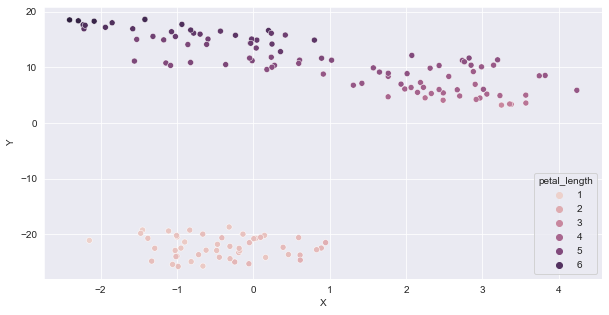

In [23]:
sns.scatterplot(x='X', y='Y', hue='petal_length', data=iris)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)